# Innhold

### 1 Innledning

 1.1 Hva menes med turistskatt på overnattinger?
 
 1.2 Begrunnelsen for innføring av turistskatt

 1.3 Turistskatt i andre land og byer
 
 1.4 Erfaringer med turistskatt

### 2 Turistnæringen i Norge
 
 2.1 Utviklingen i hotellovernattinger over tid

 2.2 Når på året kommer det turister?

 2.3 Transportkonsum på fly og cruise

 2.4 Hotellkapasitet og rompriser

### 3 Samfunnsøkonomiske effekter - turistenes betalingsvilje

 3.1 Formålet med turistskatt

 3.2 Hvordan fungerer markedet uten en turistskatt - uten eksternaliteter?

 3.3 Hvilke endringer forventer vi etter innføringen av turistskatten?

 3.4 Samfunnsøkonomisk effektivt eller bedre fordeling

 3.5 Størrelsen på effekten, og hva denne avhenger av

 3.6 Priselastisitet på ferieopphold i Norge

 3.7 Oppfylles formålet med tiltaket?

### 4 Samfunnets verdsetting

 4.1 Kostnaden turismen påfører samfunnet

 4.2 Kostnaden for samfunnet

 4.3 Innføring av avgift

 4.4 Samfunnsøkonomisk optimalt

 4.5 Igjen - Oppfylles formålet med tiltaket?

### 5 Konklusjon

### 6 Litteraturliste

 6.1 Litteratur
 
 6.2 Datasett

# 1 Innledning

### 1.1 Hva menes med en turistskatt på overnattinger?

En turistskatt på overnattinger er en avgift som overnattende betaler ved opphold på hotell eller annet overnattingssted. Denne avgiften kommer i tillegg til merverdiavgiften, som etter dagens sats tilsier tolv prosent. Denne avgiften skal kreves inn av de som tilbyr overnattinger, som oftes hoteller. Det vurderes innført at kommunene selv kan velge om de ønsker å kreve inn en slik turistskatt [1].

### 1.2 Begrunnelsen for innføring av turistskatt

Reiselivet i Norge benytter seg av flere felles goder som ikke eies eller betales av reiselivsaktørene. Eksempler på fellesgoder kan være merkede stier, nasjonale turistveier, offentlig transport, skiløyper, osv. Formålet med innføring av en turistskatt er at turistene skal bidra til å finansiere fellesgoder som gjerne ofte er benyttet av reiselivet [2]. 

### 1.3 Turistskatt i andre land og byer

I følge Reiseliv.no, er turistskatt allerede utbredt i flere land og byer rundt om i verden. Nylig i 2022 innførte EU en slags turistskatt, i form av ett gebyr for en søknad ved innreise for ikke-EU borgere, mellom 18 og 70 år. Dette må blant annet amerikanere, australere, briter, og andre utenfor schengen betale ved innreise [3]. Det er også innført et miljøvernsgebyr på Svalbard, i form av en avgift fast avgift på 150 kroner som betales som et tillegg på flybiletten ved utreise [7].

Videre i følge Reiseliv.no, viser de til flere populære feriedestinasjoner som har en slik turistskatt. Ett land som har innført turistskatt er Italia. I Roma ligger det en avgift på mellom tre og sju euro per natt, avhenging av romtype. I Venezuela ble det i fjor foreslått en turistskatt mellom tre og ti euro per natt, avhenging av sesong. Vi skal se litt nærmere på en turistskatt i form av en fast avgift per rom. [3]. 

Berlin har nylig innført ett gebyr på 5 prosent for overnattene, med unntak for forretningsreisende. Forretningsreisende slipper denne avgiften dersom de kan dokumentere formålet med overnattingen. Dette unntaket kan vurderes i Norge også ved en eventuell innføring av avgift [8]. 

### 1.4 Erfaringer med turistskatt

Som tidligere nevnt har turistskatt vært innført i flere land. En by som innførte turistskatt allerede i 1973 er Amsterdam i Nederland. Selv 50 år etter innføringen, har dette ikke avskrekket turister, og turismen har vokst vært år siden (Unntak covid-årene.) [4].

Næringslivet innenfor turisme tror heller ikke at turister vil bli skremt av en turistskatt. Turistoperatør i Lofoten Gunnar Skjeseth sier til TV2 at en slik skatt lite sansynlig vil få turistene i Norge til å reagere negativt. Han begrunner dette med turistene som strømmer til Norge gjerne er pengesterke, da Norge allerede regnes som et dyrt land å feriere i [5].


# 2 Turistnæringen i Norge

### 2.1 Utviklingen i hotellovernattinger over tid

Figur 1 viser utviklingen i antall overnattinger på hoteller over tid.

In [21]:
#laster inn pakker
import json
import pandas as pd
import requests
from pyjstat import pyjstat
from matplotlib import pyplot as plt
import sympy as sp 
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings

#for å fjerne Settingwithcopywarning melding
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [22]:
#urls og query
overnattinger_over_tid_url = "https://data.ssb.no/api/v0/no/table/08403/"

turistkonsum_url = "https://data.ssb.no/api/v0/no/table/10638/"

kapasitet_url = "https://data.ssb.no/api/v0/no/table/13156/"

rompris_url = kapasitet_url


overnattinger_over_tid_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Landet",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

overnattinger_ferie_over_tid_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Landet",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "03"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

turistkonsum_skip_fly_query = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "01.05",
          "01.06"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
} 

kapasitet_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:LandetNyn",
        "values": [
          "0N"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KapasitetRom"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

rompris_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:LandetNyn",
        "values": [
          "0N"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PrisRom"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [23]:
#funksjon for å lage datasett
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

#lager akse
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel(y_lab, loc='top')
                ax.set_xlabel(x_lab, loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (per rom)', loc='top')
                ax.set_xlabel('Antall overnattinger', loc='right')
                ax.set(xlim=(150,275))
                ax.set(ylim=(55,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [24]:
overnattinger_over_tid, overnattinger_over_tid_id, ds = apiToDataframe(overnattinger_over_tid_url, overnattinger_over_tid_query) #lager dataframe

overnattinger_over_tid[['year', 'month']] = overnattinger_over_tid['måned'].str.split('M', expand=True) #lager måned og år kolonne.

årlige_overnattinger = overnattinger_over_tid.groupby("year").agg({'value': 'sum'}) #summerer antall overnattinger for hele året

årlige_overnattinger = årlige_overnattinger.reset_index() #resetter index da vi bare value ble index etter summeringen i linjen ovenfor.

årlige_overnattinger['year'] = pd.to_numeric(årlige_overnattinger['year']) #gjør år til numeriske verdier

årlige_overnattinger = årlige_overnattinger[årlige_overnattinger['year'] <= 2022] #fjerner år 2023 da denne inneholder bare en måned i datasettet, og dermed blir feil da 
#verdiene er en summering av alle månedene.



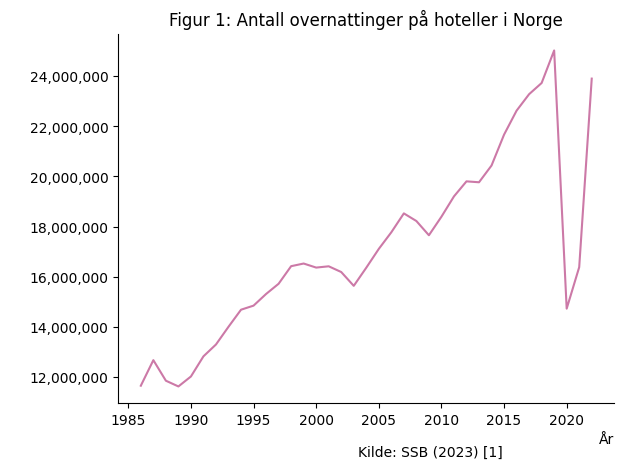

In [25]:
y_lab=" "
x_lab="År"

fig1, ax = create_ax()
ax.plot(årlige_overnattinger["year"], årlige_overnattinger["value"], color="#CC79A7")
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Figur 1: Antall overnattinger på hoteller i Norge')
fig1.text(.5, .0001, "Kilde: SSB (2023) [1]", ha='left')
plt.show()

Figur 1 indikerer en sterk økning i antall overnattinger på hoteller i Norge. Unntaket er i 2020 og 2021, som var preget av covid-restriksjoner. I 1985 ser vi at det var ca. 12 millioner overnattinger på hoteller i Norge. Ser vi på året 2019, året før pandemien, var det i overkant av 24 millioner overnattinger i Norge. Dette er dobbelt så mange overnattinger som i 1986. 

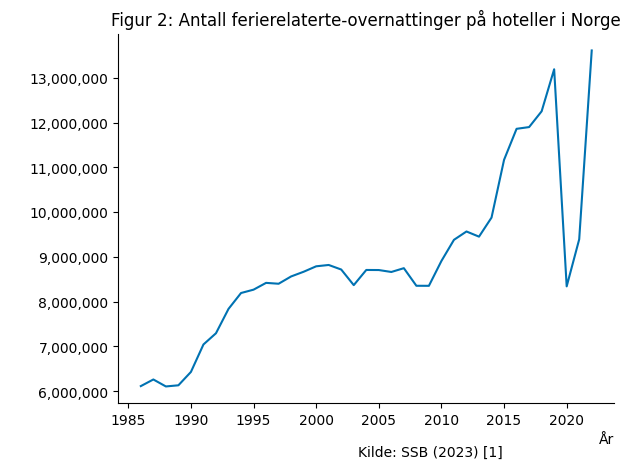

In [26]:
overnattinger_ferie_over_tid, overnattinger_ferie_over_tid_id, ds = apiToDataframe(overnattinger_over_tid_url, overnattinger_ferie_over_tid_query) #lager dataframe

overnattinger_ferie_over_tid[['year', 'month']] = overnattinger_ferie_over_tid['måned'].str.split('M', expand=True) #lager måned og år kolonne.

årlige_overnattinger_ferie = overnattinger_ferie_over_tid.groupby("year").agg({'value': 'sum'}) #summerer antall overnattinger for hele året

årlige_overnattinger_ferie = årlige_overnattinger_ferie .reset_index() #resetter index da vi bare value ble index etter summeringen i linjen ovenfor.

årlige_overnattinger_ferie['year'] = pd.to_numeric(årlige_overnattinger_ferie['year']) #gjør år til numeriske verdier

årlige_overnattinger_ferie = årlige_overnattinger_ferie[årlige_overnattinger_ferie['year'] <= 2022] #fjerner år 2023 da denne inneholder bare en måned i datasettet, og dermed blir feil da 
#verdiene er en summering av alle månedene.

fig2, ax = create_ax()
ax.plot(årlige_overnattinger_ferie["year"], årlige_overnattinger_ferie["value"], color="#0072B2")
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Figur 2: Antall ferierelaterte-overnattinger på hoteller i Norge')
fig2.text(.5, .0001, "Kilde: SSB (2023) [1]", ha='left')
plt.show()

Figur 2 viser antall hotellovernattinger som er ferie-relaterte. Vi ser en sterk økning i perioden 2009 til 2019. I 2020 og 2021, var landet preget av pandemi, og restriksjoner tilknyttet dette, dermed er tallene gjerne urelevante til sammenligning. I 2022 ser vi igjen en sterk økning i antall ferierende i Norge. Utifra figur 1 og figur 2, kan vi se at feriereisende står for over halvparten av de totale hotellovernattingene her til lands. Denne økningen i antall overnattinger vil medføre økt bruk av tjenester som er finansiert av samfunnet. Her kan det vurderes en innføring av egen skatt med en eventuell høyere rate for turister enn forretningsreisende, evenetuellt at forretningsreisende slipper turistavgiften. 

### 2.2 Når på året kommer det turister?



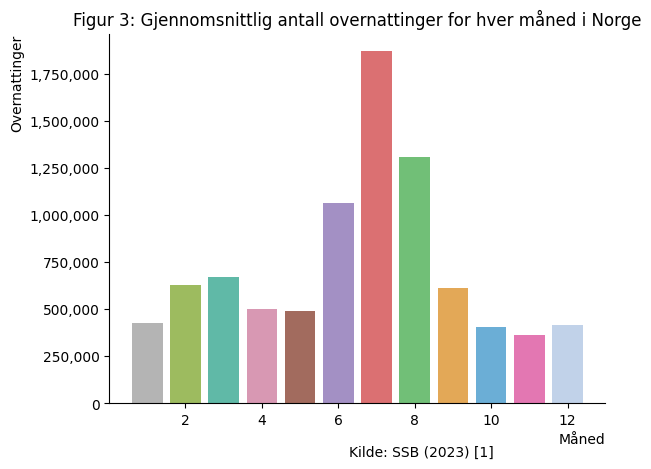

In [27]:
overnattinger_ferie, overnattinger_ferie_id, ds = apiToDataframe(overnattinger_over_tid_url, overnattinger_ferie_over_tid_query) #lager dataframe
overnattinger_ferie[['year', 'month']] = overnattinger_ferie['måned'].str.split('M', expand=True) #lager måned og år kolonne.
overnattinger_ferie['year'] = pd.to_numeric(overnattinger_ferie['year']) #gjør år til numeriske verdier
overnattinger_ferie['month'] = pd.to_numeric(overnattinger_ferie['month']) #gjør år til numeriske verdier
overnattinger_ferie = overnattinger_ferie[overnattinger_ferie["year"] <= 2019] #fjerner årene etter 2019, da disse er preget av covid og dermed urelevant for sammenligningen.
overnattinger_ferie_fra15 = overnattinger_ferie # lager et datasett til bruk senere
overnattinger_ferie = overnattinger_ferie[["month", "year", "value"]] #velger ønskede kolonner

overnattinger_ferie = overnattinger_ferie.groupby(['month'])['value'].mean() #lager ett gjennomsnitt for månedene.
overnattinger_ferie = overnattinger_ferie.reset_index() #resetter indeks

x_lab="Måned" #xlabel
y_lab="Overnattinger" #ylabel
colors = ['#b4b4b4', '#9dbb5f', '#60b9a7', '#d898b3', '#a26b5e', '#a390c4', '#db7072', '#71bf77', '#e3a857', '#6baed6', '#e377b2', '#c1d2e9'] #liste med fargekoder til plot

fig3, ax = create_ax() #skaper akse
ax.yaxis.set_major_formatter('{x:,.0f}') #får tallverdier på yakse istedet for i e format
ax.bar(overnattinger_ferie["month"], overnattinger_ferie["value"], color=colors) #plot, bar
ax.set_title('Figur 3: Gjennomsnittlig antall overnattinger for hver måned i Norge') #title
fig3.text(.5, .0001, "Kilde: SSB (2023) [1]", ha='left') #caption
plt.show()


Figur 3 viser gjennomsnittlig antall overnattinger i hver av månedene i perioden 1986 til 2019. I figuren ser vi at det er flest hotellopphold forbindelse med ferie på sommeren. 

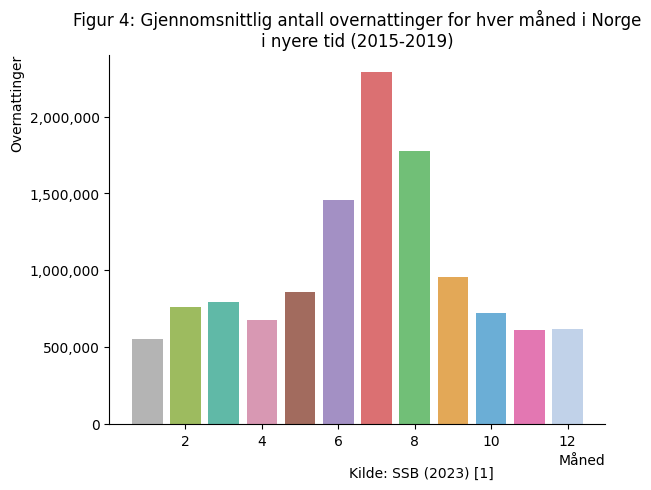

In [28]:
overnattinger_ferie_fra15 = overnattinger_ferie_fra15[overnattinger_ferie_fra15["year"] >= 2015] #fjerner årene før 2015, da jeg ønsker å se på i de nyere årene.

overnattinger_ferie_fra15 = overnattinger_ferie_fra15[["month", "year", "value"]] #velger ønskede kolonner

overnattinger_ferie_fra15 = overnattinger_ferie_fra15.groupby(['month'])['value'].mean() #lager ett gjennomsnitt for månedene.
overnattinger_ferie_fra15 = overnattinger_ferie_fra15.reset_index() #resetter indeks

fig4, ax = create_ax() #skaper akse
ax.yaxis.set_major_formatter('{x:,.0f}') #får tallverdier på yakse istedet for i e format
ax.bar(overnattinger_ferie_fra15["month"], overnattinger_ferie_fra15["value"], color=colors) #plot, bar
ax.set_title("""Figur 4: Gjennomsnittlig antall overnattinger for hver måned i Norge
i nyere tid (2015-2019)""") #title
fig4.text(.5, .0001, "Kilde: SSB (2023) [1]", ha='left') #caption
plt.show()

Figur 4 viser også gjennomsnitt antall overnattinger for månedene i perioden 2015 til 2019. Igjen ser vi samme bilde at antall hotellovernattinger forbundet med ferie er høyest om sommeren. I de nyere årene ser vi gjevnt over et høyere antall overnattende, selv om bildet ser relativt likt ut som på figur 3. Ved en eventuell innføring av en turistskatt, kan man vurdere å ta høyde for justeringer ut i fra hvilken sesong det er, som de har blant annet gjort i Venezuela [3].

### 2.3 Transportkonsum på fly og cruise

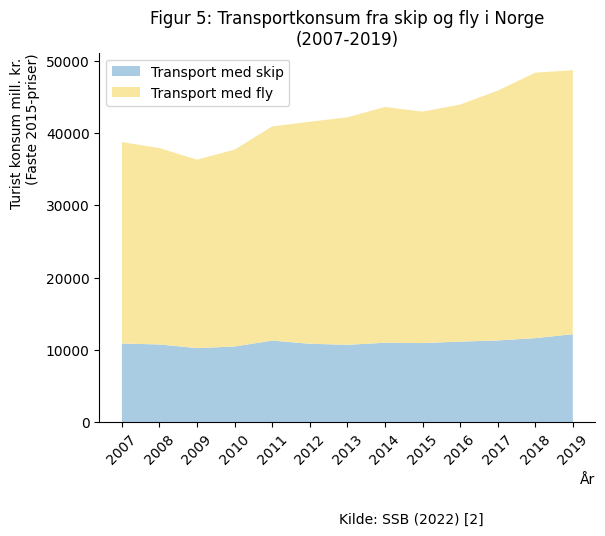

In [29]:
transport, transport_id, ds = apiToDataframe(turistkonsum_url, turistkonsum_skip_fly_query) #lager dataframe
transport = transport[["reiselivsnæring", "år", "value"]] #velger ønskede kolonner

transport_skip = transport[transport["reiselivsnæring"] == "Transport med skip og ferger"] #ny df med bare skip og ferger konsum
transport_fly = transport[transport["reiselivsnæring"] == "Transport med fly"] #ny df med bare flykonsum

x_lab = "År"
y_lab = """Turist konsum mill. kr. 
(Faste 2015-priser)"""

col = ['#A9CCE3', '#F9E79F']

fig5, ax = create_ax()
ax.stackplot(transport_fly["år"], transport_skip["value"], transport_fly["value"], labels=["Transport med skip", "Transport med fly"], colors=col) #stackplot
ax.legend(loc='upper left') #legende
ax.set_title("""Figur 5: Transportkonsum fra skip og fly i Norge
(2007-2019)""") #title
for tick in ax.get_xticklabels(): #loop som setter alle x labels 45 grader.
    tick.set_rotation(45)
fig5.text(.5, -0.1, "Kilde: SSB (2022) [2]", ha='left') #caption
plt.show()

Da forslaget er å innføre en turistskatt på overnattinger, vil antallet som ankommer med fly og cruise (skip) avgjøre hvor stor andel av turistene som bidrar til fellesgodene. Figur 5 viser at det er en betydelig større andel turistkonsum på transport med fly i forhold til med skip. Dette kan tyde på at store deler av turistene bidrar til fellesgodene ved en eventuell innføring av en turistskatt. Da det kommer turister også med cruise, kan man vurdere å innføre en egen avgift for disse.

### 2.4 Hotellkapasitet og rompriser

Figur 6 viser hvor stor andel av rommene som har vært booket, altså hvor mye av det totale overnattingstilbudet som er utnyttet i Norge.

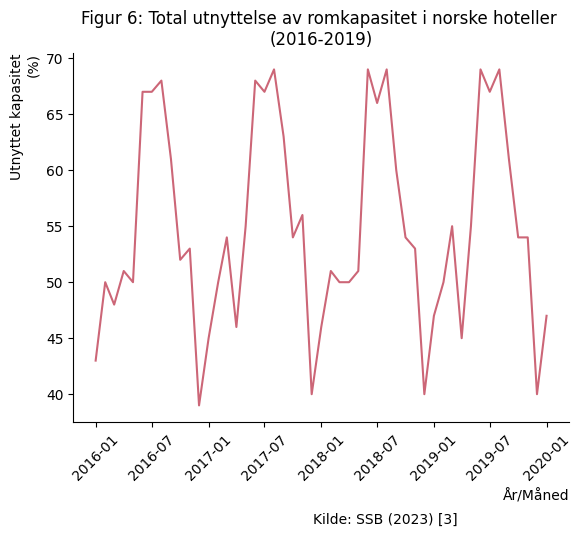

In [30]:
kapasitet, kapasitet_id, ds = apiToDataframe(kapasitet_url, kapasitet_query) #lager dataframe
kapasitet['date'] = pd.to_datetime(kapasitet['måned'], format='%YM%m') #datokolonne
kapasitet= kapasitet[kapasitet["date"]<= "2020-01-01"] #fjerner år etter 2020

y_lab = """Utnyttet kapasitet
(%)"""
x_lab = "År/Måned"

fig6, ax = create_ax()
ax.plot(kapasitet["date"], kapasitet["value"], color="#CC6677")
ax.set_title("""Figur 6: Total utnyttelse av romkapasitet i norske hoteller 
(2016-2019)""") #title
for tick in ax.get_xticklabels(): #loop som setter alle x labels 45 grader.
    tick.set_rotation(45)
fig6.text(.5, -0.1, "Kilde: SSB (2023) [3]", ha='left') #caption
plt.show()


Figuren viser at ledig kapasitet er langt lavere på sommertid, altså den perioden flest turister ankommer Norge. Det vil si at etterspørselen er høyere på sommerstid, og betalingsvilligheten er høyere. 

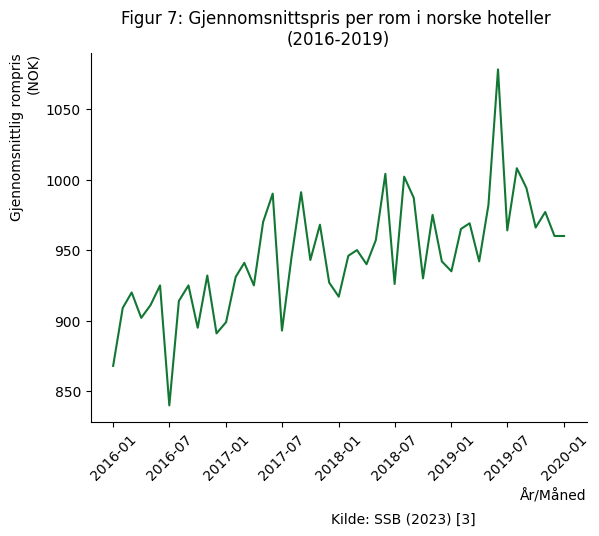

In [31]:
rompris, rompris_id, ds = apiToDataframe(rompris_url, rompris_query) #lager dataframe
rompris['date'] = pd.to_datetime(rompris['måned'], format='%YM%m') #datokolonne
rompris = rompris[rompris["date"]<= "2020-01-01"] #fjerner år etter 2020

y_lab = """Gjennomsnittlig rompris
(NOK)"""

fig7, ax = create_ax()
ax.plot(rompris["date"], rompris["value"], color="#117733")
ax.set_title("""Figur 7: Gjennomsnittspris per rom i norske hoteller 
(2016-2019)""") #title
for tick in ax.get_xticklabels(): #loop som setter alle x labels 45 grader.
    tick.set_rotation(45)
fig7.text(.5, -0.1, "Kilde: SSB (2023) [3]", ha='left') #caption
plt.show()

Figur 7 angir utviklingen i gjennomsnittlig pris per rom i Norge. Figur 6 viste at utnyttelsegraden har holdt seg relativt likt utfra månedene, men priser har holdt en ugjevn utvikling. Selv om prisutviklingen har vært ugjevn, ser vi at prisen øker. Dette vil igjen føre til at inntektene til hotellene øker. Vi skal senere se på hvordan en avgift vil påvirke markedet, og hvordan likevekten vil endres. 

# 3 Samfunnsøkonomiske effekter - turistenes betalingsvilje

I del 3 forklares det hvordan tilbud- og etterspørselen fungerer i et marked uten eksternaliteter. Her går man inn på formålet med avgiften, hvordan markedet fungerer, likevekt, konsument- og produsentoverskudd, og effektene av innføringen av avgiften. Senere i del 4 tar vi med hvordan markedet fungerer med eksternaliteter.

### 3.1 Formålet med en turistskatt

Formålet med innføringen av en turistskatt, er å samle inn midler for å finansiere fellesgoder som blant annet blir benyttet av reiselivet. Fellesgoder som benyttes av reiselivet er blant annet kollektivtransport, nasjonale turistveier og stier [1]. I tillegg kan dette være for å skåne turistmålet slik som på Svalbard [7].

### 3.2 Hvordan fungerer markedet uten en turistskatt - uten eksternaliteter?

Markedet for overnattinger på hoteller kan fremstilles slik:

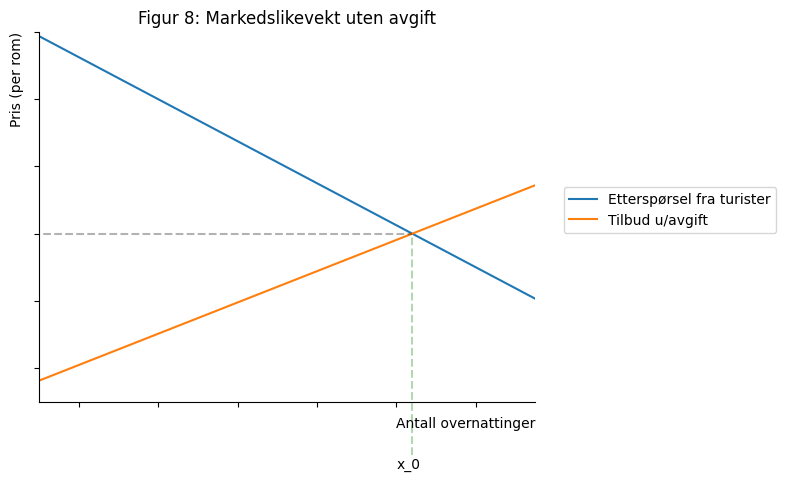

In [32]:
x, p, t=sp.symbols('x p t', real=True, positive=True)

def demand(x):
    return (500-x)/3.2
def supply(x, t):
    return ((100+x)/4.3) + t

equ=sp.Eq(demand(x),supply(x, t))

x_eq=sp.solve(equ,x)
x_eq = x_eq[0]

p_eq=demand(x_eq)

#liste med tall fra 0.1 til 100. 
x_num=np.linspace(0.1,500,100)

equ_t0 = sp.Eq(demand(x),supply(x, 0))

x_eq_t0 = sp.solve(equ_t0,x)
x_eq_t0 = float(x_eq_t0[0])

p_eq_t0=demand(x_eq_t0)

x_num=np.linspace(0.1,500,100)

equ_t0 = sp.Eq(demand(x),supply(x, 0))

x_eq_t0 = sp.solve(equ_t0,x)
x_eq_t0 = float(x_eq_t0[0])

p_eq_t0=demand(x_eq_t0)

#skaper figur med funksjonen vår ovenfor
fig8, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#tittel
ax.set_title('Figur 8: Markedslikevekt uten avgift')

#rekke med tall fra 0 til likevekt
q = np.linspace(0,x_eq_t0,100)

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)

ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Figur 8 illusterer markedet for hotellovernattinger i Norge. Tilbud (den oransje linjen) representerer marginalkostnadene til hotellene. Det vil si at for at hotellene skal kunne dekke sine kostnader for å tilby x antall overnattinger, må de minst y pris per rom. Videre har vi etterspørsel (den blå linjen). Etterspørselen forteller oss om hvor mange x overnattinger som er etterspurt til en y pris. Altså hvor mange overnattinger konsumentene ønsker å kjøpe totalt til en hver pris. Punktet der disse linjene krysser (markert med stiplet linjer i figur 8) kalles markedets likevekt. 

Likevekten er hvor tilbudere (i vårt tilfelle hotellene) selger like mange overnattinger som etterspørrerne (turistene og andre overnattende) ønsker å kjøpe. Dette vil skje ved x_0 overnattinger solgt. 

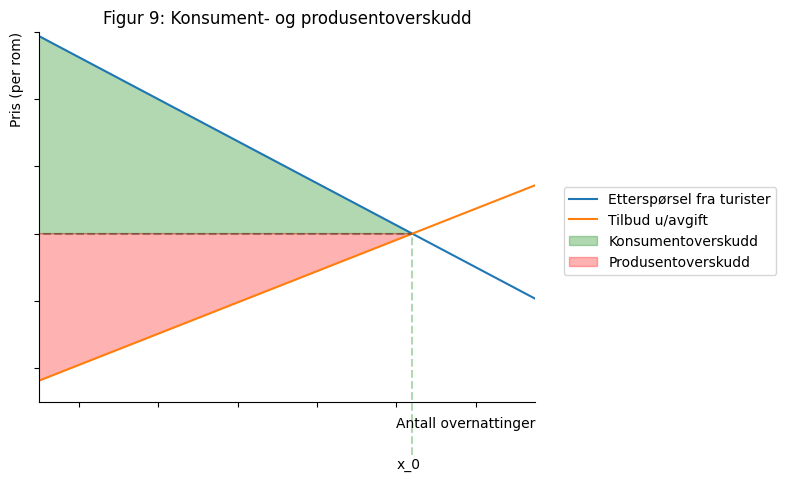

In [33]:
fig9, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#tittel
ax.set_title('Figur 9: Konsument- og produsentoverskudd')

#rekke med tall fra 0 til likevekt
q = np.linspace(0,x_eq_t0,100)

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)

#fyller inn konsument og produsent overskudd
ax.fill_between(q,p_eq_t0,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q, 0),p_eq_t0, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))
plt.show(x)

Det totale samfunnsøkonomiske overskuddet er gitt med konsumentoverskuddet + produsentoverskuddet som er vist i figuren. Konsumentoverskuddet er prisen konsumenten er villig til å betale minus det konsumenten faktisk må betale. Produsentoverskuddet er prisen tilbyderne får minus marginalkostnadene til tilbyderne. Dermed vil det totale samfunnsøkonomiske overskuddet være det grønne markerte området pluss det røde markerte området (jo større skravert område, desto bedre.)

### 3.3 Forventninger med innføring av en turistskatt

Ved innførelse av en turistskatt vil prisen for overnattingene øke. Det vil bli gitt ved et påslag av romprisen. Slik vi så i figur 8, representerer tilbudslinjen marginalkostnadene til hotellene. Da turistskatten skal innkreves av hotellene, vil hotellene måtte paralellforskyve tilbudskurven, slik at kurven ovenfor er lik marginalkostnadene tidligere pluss turistavgiften. Se figur 10 nedenfor: 

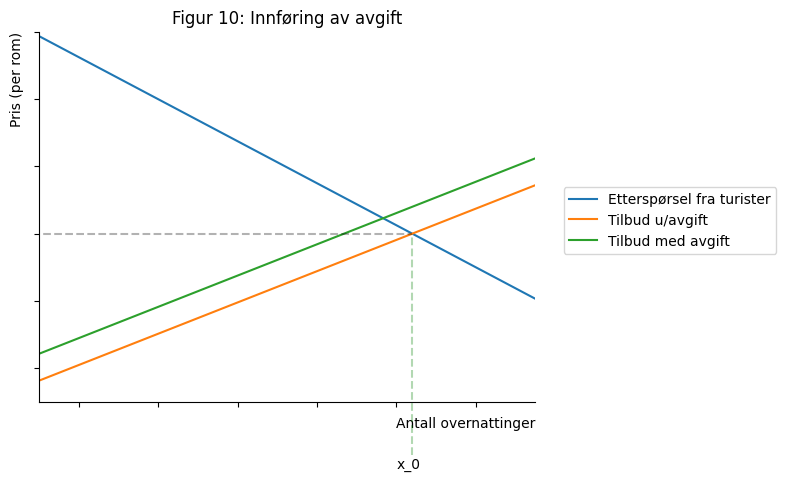

In [34]:
fig10, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), label="Tilbud med avgift")

#tittel
ax.set_title('Figur 10: Innføring av avgift')

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)
ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))
plt.show(x)

Figur 10 viser den paralellforskyvde tilbudskurven, som vil være hotellets marginalkostnader pluss avgiften på overnattingen. Dette vil gjerne påvirke markedet med at vi får høyere rompris, og mindre antall overnattinger. Vi ser også at vi vil få en ny likevekt hvor tilbudsgrafen med avgift (den grønne) krysser etterspørselen.

### 3.4 Samfunnsøkonomisk effektivt eller bedre fordeling

Figuren nedenfor viser hvordan fordelingen blir etter innføringen av turistavgiften:

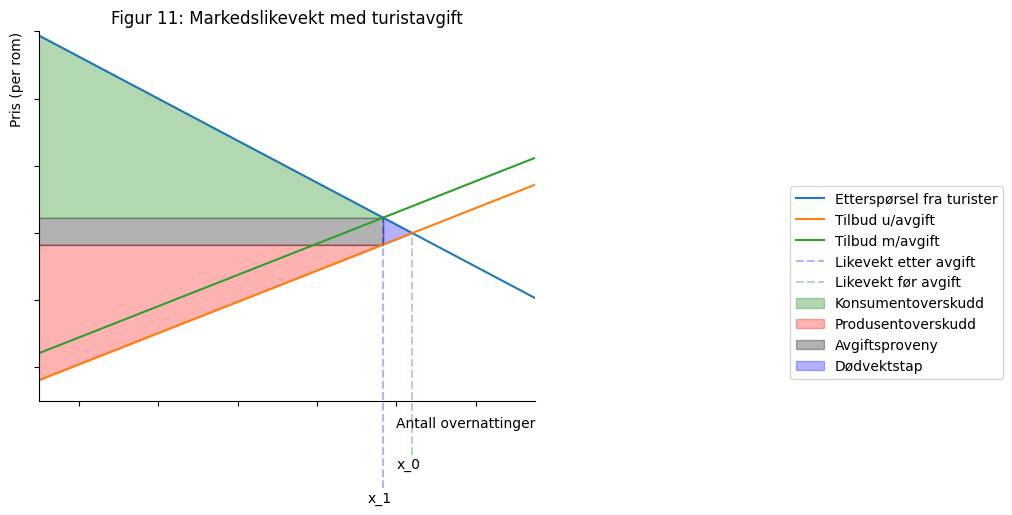

In [35]:
equ_t4 = sp.Eq(demand(x),supply(x, 4))

x_eq_t4 = sp.solve(equ_t4,x)
x_eq_t4 = float(x_eq_t4[0])

p_eq_t4=demand(x_eq_t4)

#skaper figur med funksjonen vår ovenfor
fig11, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')

#tittel
ax.set_title('Figur 11: Markedslikevekt med turistavgift')

#rekke med tall fra 0 til likevekt
q2 = np.linspace(0,x_eq_t4,100)

#rekke med tall fra likevekt med avgift til likevekt uten avgift
q3 = np.linspace(x_eq_t0,x_eq_t4,100)

#vertikallinjer for å markere likevekt.
ax.vlines(x_eq_t4,42,demand(x_eq_t4), color='b',ls='dashed', alpha= 0.3, label='Likevekt etter avgift', clip_on=False) #clipon false gjør at vlines clipper gjennom rammen.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, label='Likevekt før avgift', clip_on=False)

#tekst for likevektkvantum
ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)
ax.annotate("x_1", xy=(round(x_eq_t4, 2)-4, 40), annotation_clip=False)


#fyller inn konsument og produsent overskudd
ax.fill_between(q2,p_eq_t4,demand(q2), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq_t4-4, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = "black",alpha = 0.3,label='Avgiftsproveny')
ax.fill_between(q3,supply(q3, 0),demand(q3), color = "blue",alpha = 0.3,label='Dødvektstap')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Figur 11 viser markedslikevekten med turistskatten, konsumentoverskuddet, produsentoverskuddet, avgiftsprovenyen og dødvektstapet. Den nye likevekten er ved x_1 antall overnattinger, som er mindre enn vi tidligere hadde. Vi ser også at det samfunnsøkonomiske overskuddet blir mindre ved innføring av en turistskatt, dermed ikke samfunnsøkonomisk effektivt. Det samfunnsøkonomiske overskuddet her vil være konsumentsoverskuddet, produsentoverskuddet og avgiftsprovenyen sammenlagt. Det gråe området i figuren representerer avgiftsprovenyen, altså inntekten staten får etter innføringen av avgiften. Grunnen til at dette vil være mindre samfunnsøkonomisk effektivt kan en se i figuren ovenfor. Det blå markerte området viser dødsvektstapet, altså et antall overnattinger som ellers ville blitt solgt dersom vi ikke innførte turistavgiften. 

Målet med innføringen er at turistnæringen skal være med å finansiere fellesgoder. Ved innføring får vi en avgiftsproveny, som går til myndighetene. Myndighetene kan videre benytte disse midlene til å finansiere fellesgoder, som igjen var formålet med innføring av en slik turistskatt.

### 3.5 Priselastisitet på ferieopphold i Norge

Priselastisitet er et mål på hvor mye etterspørselen endrer seg ved en marginal økning i pris, oftest referert til 1 prosent. Ta for eksempel at vi har priselastisitet minus 2. Dette vil si at en økning av pris på 1 prosent, vil redusere etterspørselen med 2 prosent.  

I følge en masteroppgave Ida Engebretsen ved NTNU, ble priselastisiteten på det relative prisnivået på ferieopphold i Norge estimert til å være minus 0.6 på kort sikt og minus 2.86 på lang sikt. Det vil si en relativ prisøkning på 1 prosent, vil gi en reduksjon på etterspørsel med 0.6 på kort sikt og 2.86 prosent på langt sikt. Da overnatting i Norge er ofte forbundet med ferieopphold, kan vi anta at dette er likt for ferierelaterte-overnattinger. [6]

### 3.6 Oppfylles formålet med tiltaket?

Formålet med tiltaket er at turister skal bidra til å finansiere fellesgoder som kommunene tilbyr. Som vi så i figur 11, får myndighetene en avgiftsproveny med innføring av en slik turistskatt. Videre så vi også at vi dette ikke samfunnsøkonomisk effektivt, da vi oppnår et dødvektstap. Størrelsen på dette dødvektstapet kan ha noe å si om vi bør la kommunene kunne innføre en slik skatt eller ikke, og videre avgjøre størrelsen på denne.

# 4 Samfunnets verdsetting

I del 4 ser man på hvordan markedet fungerer med eksternalitet, altså hvordan samfunnet verdsetter turistovernattinger. Her ser man på kostnaden turismen tilføyer samfunnet. Videre blir igjen tilbud- og etterspørsel gjennomgått, samt effektene av innføringen av avgift på overnattinger. 

### 4.1 Kostnaden turismen påfører samfunnet

I del 3 ble det fortalt om hvordan markedet hadde fungert uten eksternaliteter, altså bare basert på turistenes betalingsvillighet. Turismen påfører en kostnad til samfunnet i form av bruk av fellesgoder. 

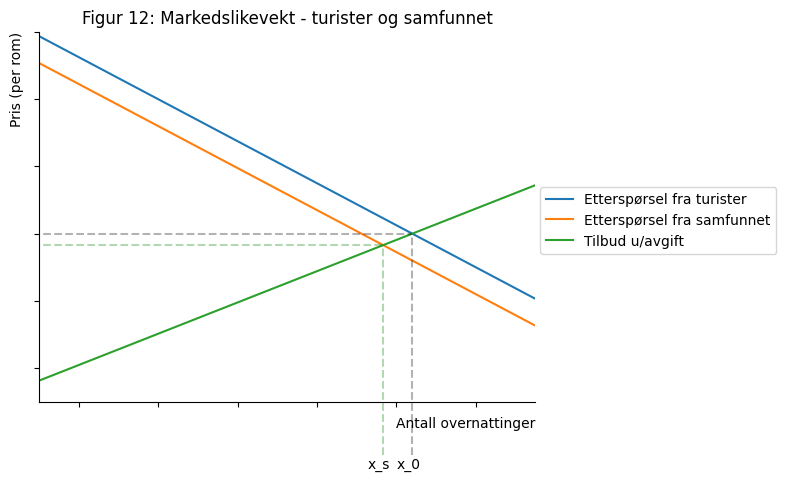

In [36]:
def demand2 (x):
    return ((500-x)/3.2) - 4

equ_t0_2 = sp.Eq(demand2(x),supply(x, 0))

x_eq_t0_2 = sp.solve(equ_t0_2,x)
x_eq_t0_2 = float(x_eq_t0_2[0])

p_eq_t0_2=demand2(x_eq_t0_2)

#skaper figur med funksjonen vår ovenfor
fig12, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, demand2(x_num), label="Etterspørsel fra samfunnet")
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#tittel
ax.set_title('Figur 12: Markedslikevekt - turister og samfunnet')

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='black',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)

ax.vlines(x_eq_t0_2,47,demand2(x_eq_t0_2), color='g',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0_2,0,x_eq_t0_2, color='g',ls='dashed', alpha=0.3)

ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

ax.annotate("x_s", xy=(round(x_eq_t0_2, 2)-4, 45), annotation_clip=False)

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Figur 12 viser hvordan etterspørselen fra turister og samfunnet er ulik. Samfunnet verdsetter goden lavere, da de tar hensyn til skaden turistaktiviteter utgjør. Turismen tar bare hensyn til egen betalingsvillighet for godet, og har dermed en høyere etterspørsel av godet. Selv om vi har x_0 overnattinger, ville det vært mest samfunnsøkonomisk optimalt med x_s overnattinger, altså likveketen med hensyn på kostnaden turismen utgjør for samfunnet.

### 4.2 Kostnaden for samfunnet

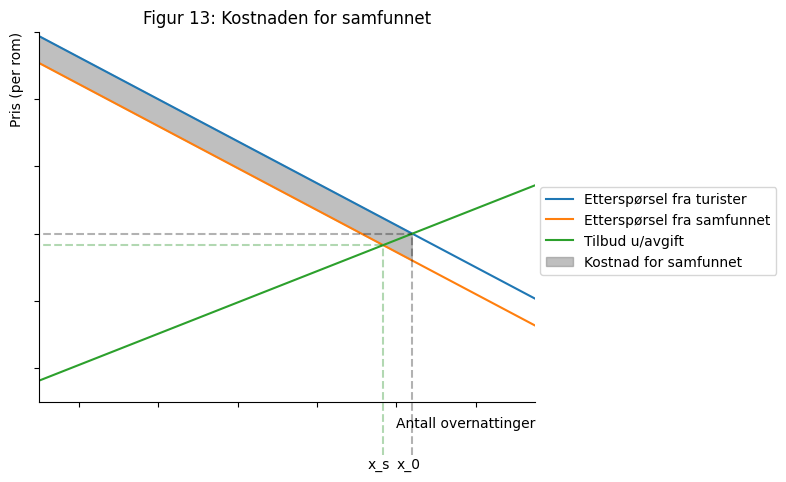

In [37]:
#skaper figur med funksjonen vår ovenfor
fig13, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, demand2(x_num), label="Etterspørsel fra samfunnet")
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#tittel
ax.set_title('Figur 13: Kostnaden for samfunnet')

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='black',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)

ax.vlines(x_eq_t0_2,47,demand2(x_eq_t0_2), color='g',ls='dashed', alpha= 0.3, clip_on=False)
ax.hlines(p_eq_t0_2,0,x_eq_t0_2, color='g',ls='dashed', alpha=0.3)

ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

ax.annotate("x_s", xy=(round(x_eq_t0_2, 2)-4, 45), annotation_clip=False)

#fyll for å markere kostnaden for samfunnet
ax.fill_between(q, demand(q), demand2(q), where=demand(q)>=demand2(q), interpolate=True, color='gray', alpha=0.5, label="Kostnad for samfunnet")

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Det grå skraverte området i figur 13 representerer kostnaden for samfunnet som følge av turismen. Igjen er dette grunnen til at samfunnet verdsetter goden mindre. 

### 4.3 Innføring av avgift

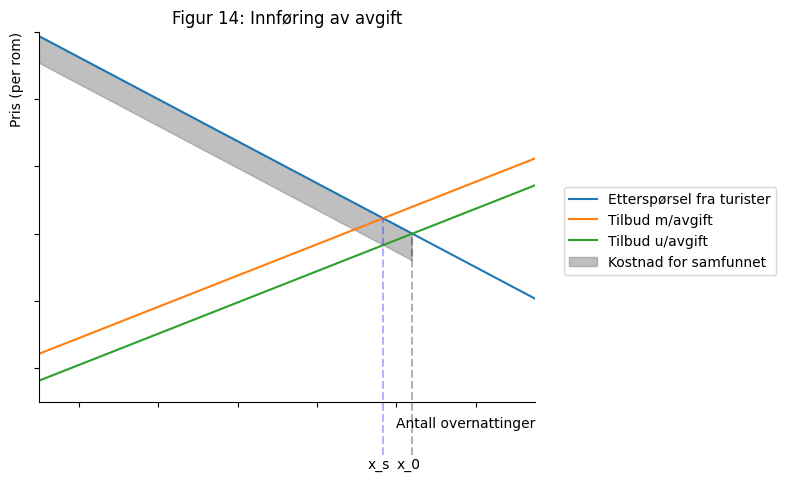

In [38]:
#skaper figur med funksjonen vår ovenfor
fig14, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#tittel
ax.set_title('Figur 14: Innføring av avgift')

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='black',ls='dashed', alpha= 0.3, clip_on=False)
ax.vlines(x_eq_t4,47,demand(x_eq_t4), color='b',ls='dashed', alpha= 0.3, clip_on=False)

ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

ax.annotate("x_s", xy=(round(x_eq_t0_2, 2)-4, 45), annotation_clip=False)

#fyll for å markere kostnaden for samfunnet
ax.fill_between(q, demand(q), demand2(q), where=demand(q)>=demand2(q), interpolate=True, color='gray', alpha=0.5, label="Kostnad for samfunnet")

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Ved innføring av en eventuell avgift på samme størrelse som differansen mellom det samfunnet og turistene er villig å betale, vil vi få et bilde som ser slikt ut som i figur 14. Den nye likevekten vil være det samfunnsoptimale antall overnattinger. Men hva skjer da?

### 4.4 Samfunnsøkonomisk optimalt


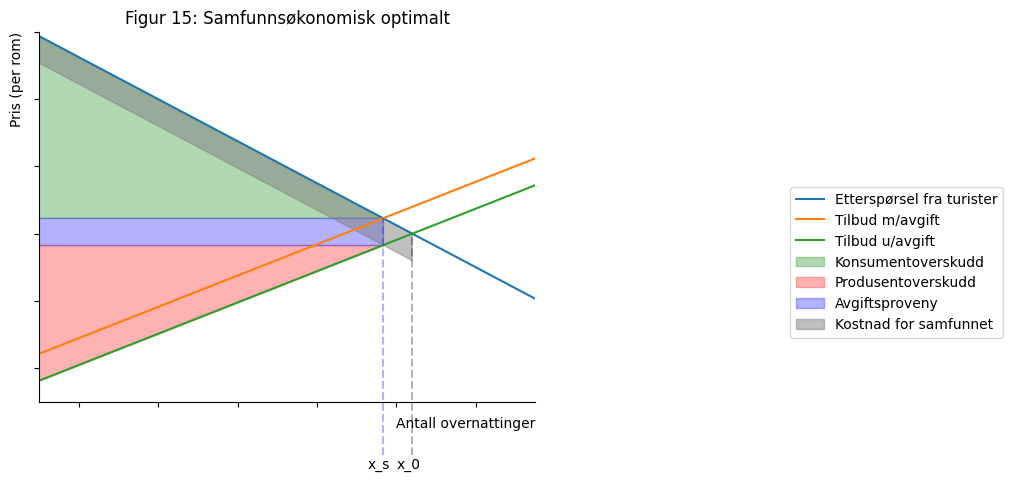

In [39]:
#skaper figur med funksjonen vår ovenfor
fig15, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel fra turister')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#tittel
ax.set_title('Figur 15: Samfunnsøkonomisk optimalt')

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='black',ls='dashed', alpha= 0.3, clip_on=False)
ax.vlines(x_eq_t4,47,demand(x_eq_t4), color='b',ls='dashed', alpha= 0.3, clip_on=False)

ax.annotate("x_0", xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)

ax.annotate("x_s", xy=(round(x_eq_t0_2, 2)-4, 45), annotation_clip=False)

#fyller inn konsument og produsent overskudd
ax.fill_between(q2,p_eq_t4,demand(q2), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq_t4-4, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = "b",alpha = 0.3,label='Avgiftsproveny')

#fyll for å markere kostnaden for samfunnet
ax.fill_between(q, demand(q), demand2(q), where=demand(q)>=demand2(q), interpolate=True, color='gray', alpha=0.5, label="Kostnad for samfunnet")

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Figur 15 viser konsumentoverskuddet, produsentoverskuddet, kostnaden for samfunnet som følge av turismen og avgiftsprovenyen. Her ser vi ett annet bilde enn vi gjorde i del 4. Det tidligere dødvektstapet er nå en kostnad for samfunnet som forsvinner. Dette øker igjen det samfunnsøkonomiske overskuddet. Vi ser her at det samfunnsøkonomiske overskuddet vil være konsumentoverskuddet og produsentoverskuddet pluss avgiftsproveny minus kostnaden for samfunnet. (Frem til x_s antall overnattinger, da resten bortfaller). 

In [40]:
#tallene stemmer med talleksemplene brukt i koden (avgfit som 4)
kostnad_turisme=sp.integrate(demand(x) - demand2(x),(x,0,x_eq_t4))

avgiftsproveny = sp.integrate(4, (x, 0, x_eq_t4))

print("Kostnad som følge av turismen minus avgiftsprovenyen er lik: " + str(kostnad_turisme - avgiftsproveny))


Kostnad som følge av turismen minus avgiftsprovenyen er lik: 0


Ved bruk av utregninger, finner vi at kostnaden frem til det samfunnsoptimale antall overnattinger minus avgiftsprovenyen er lik null. Dette vil si at avgiftsprovenyen er lik kostnaden. I tillegg har man ikke dødvektstap, men heller en kostnad som forsvinner. Dermed kan vi si at det samfunnsøkonomiske overskuddet vil være konsumentoverskuddet pluss produsentoverskuddet.

### 4.5 Igjen - Oppfylles formålet med tiltaket?

Samfunnet har lavere etterspørsel grunnet skadene turisme påfører turistmålet. Dersom vi tar hensyn til dette vil det være lurt å innføre en turistskatt for å oppnå det samfunnsoptimale antall overnattinger. Dødvektstapet som vi tidligere så, er en kostnad som forsvinner. I tillegg ser vi at avgiften dekker kostnaden som turisme påfører reisemålet.

# 5 Konklusjon

I denne utredningen har vi sett på hvordan overnattinger har utviklet seg over tid, hvilke perioder som har mest turisme og erfaringer med tidligere innføringer av turistskatt. Vi har også sett at de fleste turistene kommer seg til Norge med fly, og da er avhengig av overnatting. Videre har vi også hatt en økning i antall hotellovernattinger, og at de fleste overnattingene har skjedd på sommeren. 

Formålet med innføring av turistskatten er at turistnæringen skal bidra til å finansiere fellesgoder benyttet av næringslivet. Vi har sett på de samfunnsøkonomiske effektene av innføringen av en slik skatt, og sett fremstillingen av dette ved bruk av tilbud- og etterspørselsfigurer. Vi har sett hvordan innføringen av turistskatten påvirker markedslikevekten, både med tanke på turistene betalingsvilje, og med det optimale for samfunnet. (Da samfunnet tar hensyn til kostnadene turismen medfører).

Vi så at dersom vi innfører en avgift lik differansen mellom den samfunnets verdsetting og turistenes betalingsvillighet ville vi unngått noen kostnader til samfunnet grunnet turisme. I tillegg mottatt avgiftsproveny for å finansiere kostnaden turismen medfører. Dermed vil vi ha et samfunnsøkonomisk overskudd lik konsumentoverskuddet pluss produsentoverskuddet. Det vil si at det kan være samfunnsøkonomisk lukrativt å innføre en slik skatt. 

Vi så også tidligere at det er flest besøkende i sommermånedene, dermed kan en sesongbasert avgift også fungere som ett bedre alternativ, da etterspørselen varierer utifra sesong. Dette kan sees nøyere på i en egen utredning. I tillegg kan en vurdere unntak for blant annet forretningreisende.

# 6 Litteraturliste

### 6.1 Litteratur

[1] Nærings- og fiskeridirektoratet (2023, 19. Januar) *Vurderer destinasjoner for besøksbidrag.* https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954 

[2] NHO Reiseliv (2023, 21. Februar) *Turistskatt.* https://www.nhoreiseliv.no/vi-mener/barekraftig-reiseliv/turistskatt/

[3] Reiseliv (2022, 15. Juli) *TURISTSKATT KREVES I MANGE LAND VERDEN OVER.* https://www.reiseliv.no/reiseokonomi/turistskatt-kreves-i-mange-land-verden-over/

[4] Stortinget (2019, 3. Desember) *Representantforslag om utredning og innføring av turistskatt.* https://www.stortinget.no/no/Saker-og-publikasjoner/Publikasjoner/Representantforslag/2019-2020/dok8-201920-020s/?all=true

[5] TV2 (2023, 19. Januar) *Lofoten kan bli pilot for innføring av turistskatt.* https://www.tv2.no/nyheter/lofoten-kan-bli-pilot-for-innforing-av-turistskatt/15441045/

[6] Engebretsen, I. C. S. (2017.) *Hvordan inntekt, pris og valutakurs på- virker utenlandsk etterspørsel etter Norge som reisemål* [Masteroppgave]. NTNU. https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2486498/Masteroppgave%20Ida%20Charlotte%20Engebretsen.pdf?sequence=1

[7] Forskrift om miljøavgift for Svalbardturister. (2006). *Forskrift om miljøavgift for tilreisende til Svalbard* (LOV-2001-06-15-79). Lovdata. https://lovdata.no/dokument/SF/forskrift/2006-12-22-1532

[8] VG. (2013, 12. Desember.) *Denne storbyen innfører turistskatt.* https://www.vg.no/forbruker/reise/i/Xw9gRB/denne-storbyen-innfoerer-turistskatt

### 6.2 Datasett

[1] Statistisk sentralbyrå. (2023, 28. Februar). *08403: Hotell. Overnattingar, etter region, formål med hotelloppholdet, måned og statistikkvariabel* https://data.ssb.no/api/v0/no/table/08403/

[2] Statistisk sentralbyrå. (2022, 20. Desember). *10638: Turistkonsum i Norge, etter konsumentgruppe og reiselivsnæring (mill. kr) 2007 - 2021* https://data.ssb.no/api/v0/no/table/10638/

[3] Statistisk sentralbyrå. (2023, 28. Februar). *13156: Omsetning og kapasitetsutnytting på hotell, etter region, måned og statistikkvariabel* https://data.ssb.no/api/v0/no/table/13156/